In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from offroad.utils import load_state, lla_to_utm
import json
import ipywidgets as widgets
from car_dynamics.models_torch.dataset import clean_random_data
from ipywidgets import interact
%matplotlib inline
%load_ext autoreload
%autoreload 2

{'goal_list': [], 'controller': 'mppi-dbm', 'trajectory': 'counter oval', 'pid': {'kp': 5.0, 'ki': 0.0, 'kd': 0.05, 'max_vel': 8.0}, 'mppi': {'proj': 0.43, 'shift': 0.17, 'max_vel': 8.0, 'delay': 2, 'config': {'num_envs': 1000, 'LF': 0.11, 'LR': 0.23, 'MASS': 1.0, 'DT': 0.05, 'K_RFY': 50, 'K_FFY': 50, 'Iz': 0.10982000000000001, 'Ta': 8.0, 'Tb': -1.0, 'Sa': 0.36, 'Sb': 0.03}}, 'tag': 'identify vicon discount error'}


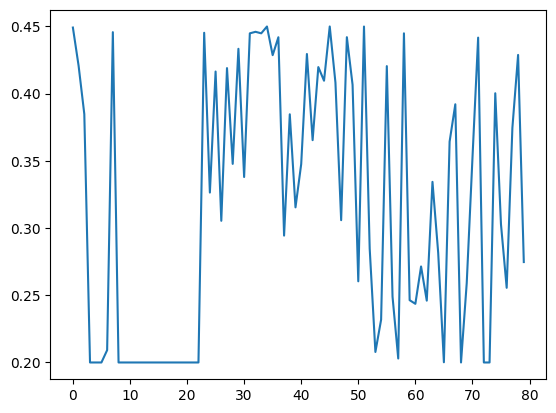

In [371]:
log_dir = '/Users/wenlixiao/Dropbox/School/Graduate/LeCAR/safe-learning-control/playground/offroad/data/' + 'dataset/data-20240307-014901'
with open(os.path.join(log_dir, 'header.json')) as f:
    header_info = json.load(f)
t_list, p_dict, yaw_dict, action_list, controller_info = load_state(log_dir, [2,10], orientation_provider="ORIENTATION_PROVIDOER")
obs_np = p_dict['obs']
obs_gps = p_dict['gps']
# obs_np_1 = obs_np + .0
targets_raw = controller_info['targets']
targets = np.array([target[0] for target in controller_info['targets']])
is_recover = controller_info['is_recover']
# mppi_traj = controller_info['mppi_traj']
print(header_info)
plt.plot(action_list[:, 0])

Text(0.5, 1.0, 'counter oval; K_*=50; Carpet Surface')

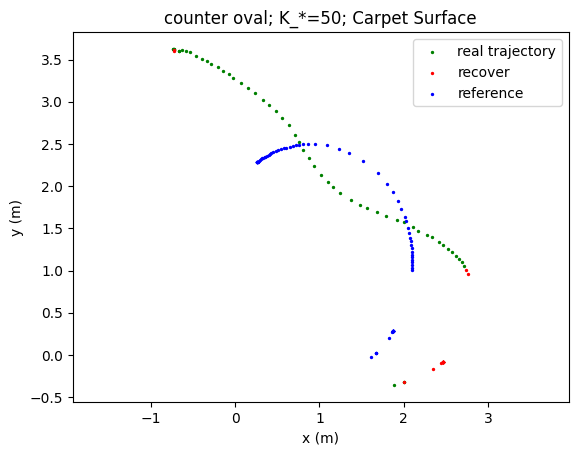

In [372]:

plt.scatter(obs_np[~is_recover, 0], obs_np[~is_recover, 1], color='green',s=2, label='real trajectory')
plt.scatter(obs_np[is_recover, 0], obs_np[is_recover, 1], color='red',s=2, label='recover')
plt.scatter(targets[:,0], targets[:,1], color='blue',s=2,label='reference')
plt.legend()
plt.axis('equal')
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title(f"{header_info['trajectory']}; K_*={header_info['mppi']['config']['K_RFY']}; Carpet Surface")

In [373]:
center = (0.9, 1.1)
a = 1.4
b = 1.2
c = np.sqrt(a**2 - b**2)
foci1 = (center[0], center[1] + c)
foci2 = (center[0], center[1] - c)

dist = np.sqrt((obs_np[~is_recover, 0] - foci1[0])**2 + (obs_np[~is_recover, 1] - foci1[1])**2) + np.sqrt((obs_np[~is_recover, 0] - foci2[0])**2 + (obs_np[~is_recover, 1] - foci2[1])**2)
dist = np.abs(dist - 2*a)
dist.mean(), dist.std(), dist.min(), dist.max()

(1.4099803162237357,
 1.0729149092691617,
 0.05584178080301161,
 3.2621556049954714)

In [238]:
(0.39136589176055425,
 0.2989889709049793,
 0.0024895670556190908,
 1.4024178095204798)
(0.4326399099304401,
 0.324712589248461,
 0.00256861107510975,
 1.3519316722323156)
(0.3651869425851077,
 0.29951600608417794,
 0.00032940413558479875,
 1.343705926509922)
(0.31647500782829413,
 0.28545637875571717,
 0.0008666429626007499,
 1.3494833816931218)
(0.36305352394860757,
 0.3048748485220918,
 8.834701314608395e-05,
 1.733899924344768)
(0.2648282076404528,
 0.22451115302744026,
 5.482667972200872e-05,
 1.192879811546287)
(0.48668947334053686,
 0.3992796213720376,
 0.0002497898178495106,
 1.4625922486933227)
(1.0935073335601648,
 0.9879694302211647,
 0.0068145259016048065,
 2.5571548128340247)
(1.4099803162237357,
 1.0729149092691617,
 0.05584178080301161,
 3.2621556049954714)

(0.8839087115361046,
 0.24841857040073853,
 0.33504019059680257,
 1.4533211814761167)

In [233]:
pos = []
for gps in obs_gps:
    if gps is None:
        continue
    gps_loc = gps['loc']
    loc = lla_to_utm(gps_loc[0], gps_loc[1])
    pos.append(loc)
pos = np.array(pos) / 100
pos -= pos[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [216]:
plt.plot(pos[-100:,0], pos[-100:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Real World Trajectory (GPS)")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [217]:
targets.shape

(300, 2)

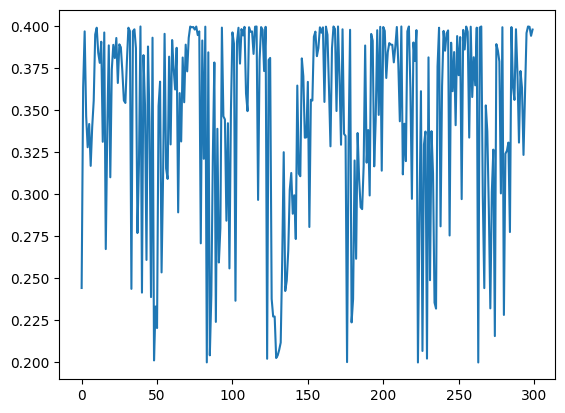

In [218]:
plt.plot(action_list[:, 0])

(array([761., 229.,  38.,  12.,   6.,   7.,   4.,   2.,   1.,   1.,   1.,
          2.,   1.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   1.,
          1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.05018544, 0.0502925 , 0.05039955, 0.05050661, 0.05061366,
        0.05072072, 0.05082777, 0.05093482, 0.05104188, 0.05114893,
        0.05125599, 0.05136304, 0.0514701 , 0.05157715, 0.05168421,
        0.05179126, 0.05189832, 0.05200537, 0.05211243, 0.05221948,
        0.05232654, 0.05243359, 0.05254065, 0.

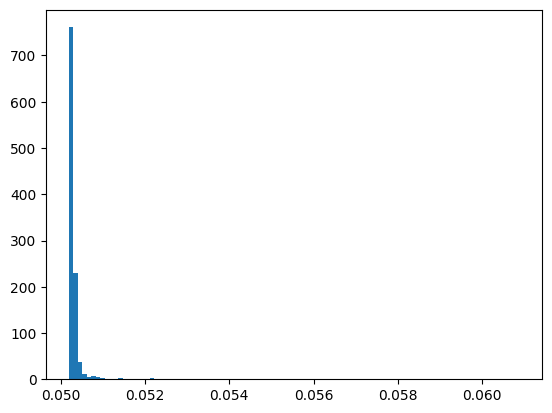

In [253]:
delta_t = t_list[1:] - t_list[:-1]
# delta_t[10:])
# plt.plot(delta_t[10:])
# plt.plot(np.sort(delta_t[10:]))
plt.hist(delta_t[10:], bins=100)
# plt.xticks([0.125, 0.13],[0.125, 0.13])

(-0.5199984289692599,
 2.1199729476221187,
 -0.5396407657639939,
 2.5399696785278967)

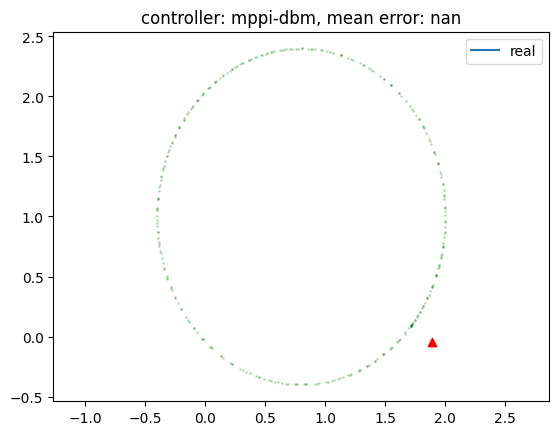

In [220]:
START_IDX=1662
END_IDX = -1
plt.scatter(obs_np[0,0],obs_np[0,1],marker='^',c='red')
plt.plot(obs_np[START_IDX:END_IDX, 0], obs_np[START_IDX:END_IDX, 1],label='real')
# plt.plot(obs_np[START_IDX:END_IDX, 5], obs_np[START_IDX:END_IDX, 6], c='red', label='waypoint')
plt.scatter(targets[:,0],targets[:,1], s=1, c='green', alpha=0.2)

dist = np.linalg.norm(obs_np[START_IDX:END_IDX, 0:2] - np.array([1., 1.2]), axis=1) - 1.2
# error = np.mean(np.abs(dist))
error = np.NaN
plt.legend()
plt.title(f"controller: {header_info['controller']}, mean error: {error}")
plt.axis('equal')
# plt.xlim([-1,3])
# plt.ylim([-1, 3])

In [180]:

def plot(N, offset=0.):
    plt.plot(obs_np[:N, 0], obs_np[:N, 1],)
    plt.scatter(obs_np[N:N+10, 0], obs_np[N:N+10, 1], c='blue', marker='x', s=10, label='latest real point')
    # plt.scatter(obs_np[N, 0] + np.cos(obs_np[N, 2] + offset)*.5, obs_np[N, 1]+np.sin(obs_np[N, 2] + offset)*.5, c='blue', marker='x', s=10, label='latest real point')
    
    # plt.scatter(obs_np[N, 5], obs_np[N, 6], c='green', s=10, label='waypoint')
    target_N = np.array(targets_raw[N])
    plt.scatter(target_N[ :, 0], target_N[:, 1], marker='^', alpha = .5, c='red', label='targets')
    # plt.plot(mppi_traj[N][:,0], mppi_traj[N][:,1], marker='x')
    plt.title(header_info['controller'])
    plt.axis('equal')
    plt.legend()
    # plt.xlim([-2,4])
    # plt.ylim([-2, 4])
    # plt.scatter(goal_list[0,0],goal_list[0,1], marker='o')
interact(plot, 
         N = (0, obs_np.shape[0], 1),
         # N = (1210, 1230, 1),
         offset = (-np.pi, np.pi, 0.01)
        )

interactive(children=(IntSlider(value=280, description='N', max=560), FloatSlider(value=0.0, description='offs…

<function __main__.plot(N, offset=0.0)>

In [89]:
trajectory_type = 'circle'
controller_type = 'pid'
DT = 0.06
SPEED = 0.5
def reference_traj(t):
    if trajectory_type == 'circle':
        if controller_type == 'pid':
            if t < .4:
                t = .1
            else:
                t -= .2
        # global total_angle
        center_circle = (.8, 1.2)
        circle_radius = 1.2
        angle = -np.pi/2  - circle_radius * SPEED * t
        return np.array([center_circle[0] + circle_radius * np.cos(angle),
                            center_circle[1] + circle_radius * np.sin(angle)])
        
    elif trajectory_type == 'counter circle':
        if controller_type == 'pid':
            if t < .4:
                t = .1
            else:
                t -= .2
        # global total_angle
        center_circle = (.9, 1.2)
        circle_radius = 1.2
        angle = -np.pi/2  + circle_radius * SPEED * t
        return np.array([center_circle[0] + circle_radius * np.cos(angle),
                            center_circle[1] + circle_radius * np.sin(angle)])
    elif trajectory_type == 'oval':
        if controller_type == 'pid':
            if t < .4:
                t = .1
            else:
                t -= .2
        center = (0.9, 1.2)
        x_radius = 1.0
        y_radius = 1.2

        # Assuming t varies from 0 to 2π to complete one loop around the oval
        angle = -np.pi/2  - t * 0.5

        x = center[0] + x_radius * np.cos(angle)
        y = center[1] + y_radius * np.sin(angle)

        return np.array([x, y])

    else:
        raise NotImplementedError
waypoint_list = np.array([reference_traj(t) for t in waypoint_t_list])

NameError: name 'waypoint_t_list' is not defined

In [ ]:
plt.plot(waypoint_t_list)

In [433]:
def print_idx(N):
    waypoint_t_list = np.arange(-np.pi*3-DT, np.pi*4+DT, 0.01)
    
    distance_list = np.linalg.norm(waypoint_list - obs_np[N, :2], axis=-1)
    # import pdb; pdb.set_trace()
    t_idx = np.argmin(distance_list)
    t_closed = waypoint_t_list[t_idx]
    waypoints = np.array([reference_traj(t) for t in waypoint_t_list])
    chosen_waypoint = reference_traj(t_closed)
    plt.plot(waypoints[:, 0], waypoints[:, 1])
    plt.scatter(chosen_waypoint[0], chosen_waypoint[1])
    plt.scatter(obs_np[N, 0], obs_np[N, 1])
    print(obs_np[N, :2],t_closed)
interact(print_idx,
            N = (0, 300,1),
        )

interactive(children=(IntSlider(value=150, description='N', max=300), Output()), _dom_classes=('widget-interac…

<function __main__.print_idx(N)>

In [71]:
obs_np.shape

(3510, 7)

In [7]:
import joblib
import matplotlib.pyplot as plt
data = joblib.load('/Users/wenlixiao/Dropbox/School/Graduate/LeCAR/safe-learning-control/playground/offroad/data/wild-data-clean/wild-sync-dataset-feb-27.pkl')
data = data['gps-data-20240227-221134']

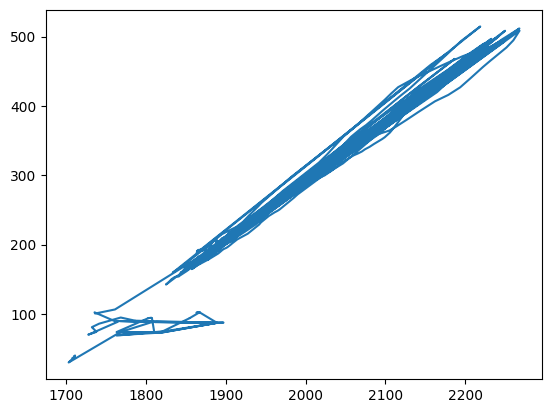

In [11]:
plt.plot(data['pos_x'], data['pos_y'])
# plt.xlim([1700, 2200])
# plt.ylim([0, 500])

In [9]:
data.keys()

Index(['time', 'pos_x', 'pos_y', 'imu_ang_vel', 'target_vel', 'target_steer'], dtype='object')